# Salários no Brasil

dados usados como base: https://blog.nilo.pro.br/posts/2022-04-03-python-no-brasil-2022/

In [1]:
from pandas import read_excel, DataFrame
from collections import Counter

In [45]:
vars = ['Estado', 'Se você trabalha, qual seu nível de salário?', 'Qual o nível do seu cargo atual']
brasil = read_excel('bases/brasil.xlsx', sheet_name='Python no Brasil')
brasil2 = read_excel('bases/brasil.xlsx', sheet_name='Python no Brasil')

# Filtro dos valores que eu gostaria
brasil = brasil[vars]

len(brasil)

897

In [3]:
def salario_por_nivel_e_estado(nivel, estado):
    return brasil.loc[
        (brasil['Qual o nível do seu cargo atual'] == nivel)
        &
        (brasil['Estado'] == estado)
    ].groupby('Se você trabalha, qual seu nível de salário?').agg({'Qual o nível do seu cargo atual': len})


def counter_estado(df, group):
    group = df.get_group(group)
    salarios = group['Estado'].dropna()
    df = DataFrame.from_dict(Counter(x for x in salarios), orient ='index')
    return df.sort_values(by=0, ascending=False)


def counter_salario(df, group):
    group = df.get_group(group)
    salarios = group['Se você trabalha, qual seu nível de salário?'].dropna()
    df = DataFrame.from_dict(Counter(x for x in salarios), orient ='index')
    return df.sort_values(by=0, ascending=False)

In [4]:
cargos_brasil = brasil.groupby('Qual o nível do seu cargo atual')

In [6]:
cargos_brasil.groups.keys()

dict_keys(['Estagiário', 'Estudante', 'Júnior', 'Medior', 'Pleno', 'Principal', 'Professor', 'Sênior'])

# Estágio

In [7]:
estagio_lugares = counter_estado(cargos_brasil, 'Estagiário')
estagio_lugares

,0
Rio Grande do Norte,4
São Paulo,3
Ceará,2
Rio de Janeiro,2
Amazonas,1
Pernambuco,1
Rio Grande do Sul,1
Espírito Santo,1
Paraná,1


## Salários de estágio

In [8]:
estagio_salario = counter_salario(cargos_brasil, 'Estagiário')
estagio_salario

,0
"Menos de R$2.000,00",14


<AxesSubplot:>

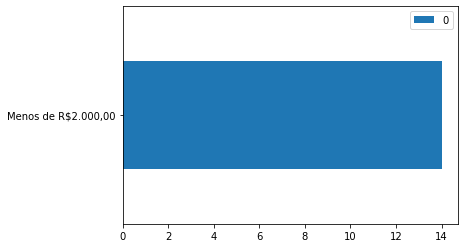

In [9]:
estagio_salario.plot.barh()

# Junior

## Onde temos mais Juniors?

<AxesSubplot:>

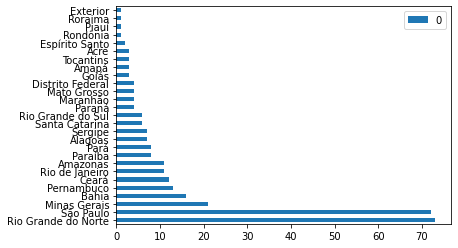

In [12]:
junior_lugares = counter_estado(cargos_brasil, 'Júnior')
junior_lugares.plot.barh()

## Salários Júnior

<AxesSubplot:>

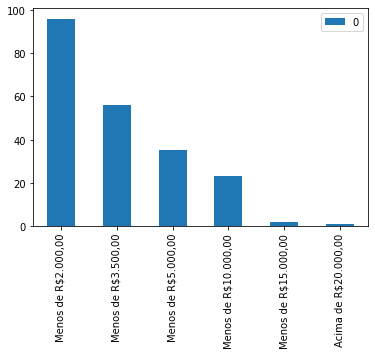

In [22]:
junior = counter_salario(cargos_brasil, 'Júnior')
junior.plot.bar()

<AxesSubplot:>

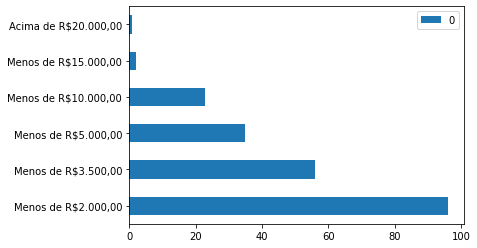

In [14]:
junior.plot.barh()

## Salários Junior por região

<AxesSubplot:ylabel='Se você trabalha, qual seu nível de salário?'>

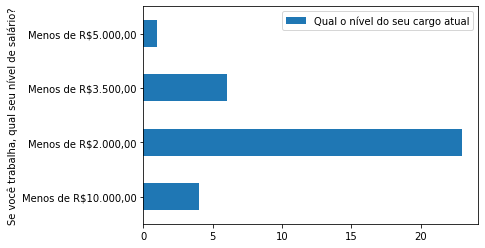

In [18]:
salario_por_nivel_e_estado('Júnior', 'Rio Grande do Norte').plot.barh()

<AxesSubplot:ylabel='Se você trabalha, qual seu nível de salário?'>

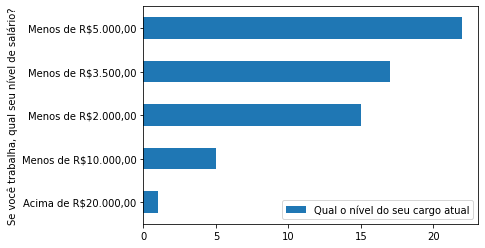

In [17]:
salario_por_nivel_e_estado('Júnior', 'São Paulo').plot.barh()

<AxesSubplot:ylabel='Se você trabalha, qual seu nível de salário?'>

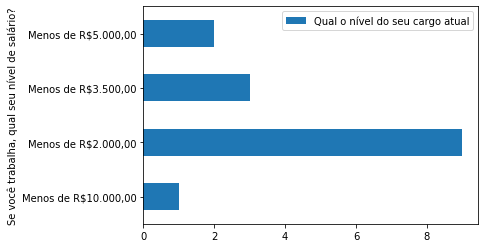

In [20]:
salario_por_nivel_e_estado('Júnior', 'Minas Gerais').plot.barh()

# Plenos

In [24]:
plenos_lugares = counter_estado(cargos_brasil, 'Pleno')
plenos_lugares

,0
São Paulo,56
Minas Gerais,12
Rio de Janeiro,12
Rio Grande do Norte,11
Rio Grande do Sul,11
Goiás,8
Paraná,8
Bahia,7
Santa Catarina,7
Pernambuco,5


## Salários Pleno

In [25]:
pleno = counter_salario(cargos_brasil, 'Pleno')
pleno

,0
"Menos de R$10.000,00",64
"Menos de R$5.000,00",34
"Menos de R$3.500,00",30
"Menos de R$2.000,00",19
"Menos de R$15.000,00",10
"Menos de R$20.000,00",7
"Acima de R$20.000,00",1


<AxesSubplot:>

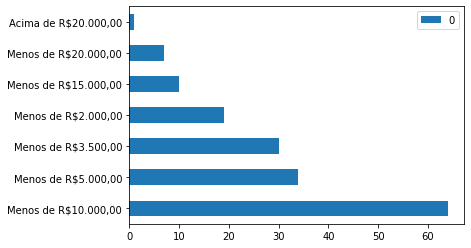

In [26]:
pleno.plot.barh()

## Salários pleno por região

In [27]:
salario_por_nivel_e_estado('Pleno', 'São Paulo')

,Qual o nível do seu cargo atual
"Se você trabalha, qual seu nível de salário?",
"Menos de R$10.000,00",24
"Menos de R$15.000,00",4
"Menos de R$2.000,00",4
"Menos de R$20.000,00",3
"Menos de R$3.500,00",8
"Menos de R$5.000,00",12


In [28]:
salario_por_nivel_e_estado('Pleno', 'Minas Gerais')

,Qual o nível do seu cargo atual
"Se você trabalha, qual seu nível de salário?",
"Menos de R$10.000,00",3
"Menos de R$2.000,00",4
"Menos de R$3.500,00",2
"Menos de R$5.000,00",1


In [29]:
salario_por_nivel_e_estado('Pleno', 'Rio de Janeiro')

,Qual o nível do seu cargo atual
"Se você trabalha, qual seu nível de salário?",
"Menos de R$10.000,00",2
"Menos de R$15.000,00",1
"Menos de R$2.000,00",1
"Menos de R$20.000,00",2
"Menos de R$3.500,00",4
"Menos de R$5.000,00",2


# Sêniors

<AxesSubplot:>

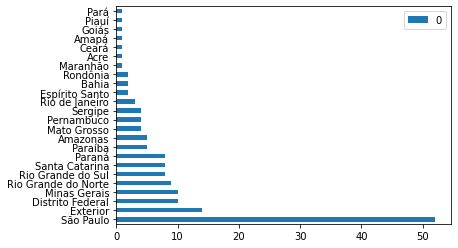

In [30]:
seniors_lugares = counter_estado(cargos_brasil, 'Sênior')
seniors_lugares.plot.barh()

In [31]:
seniors_lugares

,0
São Paulo,52
Exterior,14
Distrito Federal,10
Minas Gerais,10
Rio Grande do Norte,9
Rio Grande do Sul,8
Santa Catarina,8
Paraná,8
Paraíba,5
Amazonas,5


## Salários Sênior

In [32]:
senior = counter_salario(cargos_brasil, 'Sênior')
senior

,0
"Menos de R$15.000,00",40
"Menos de R$10.000,00",39
"Acima de R$20.000,00",34
"Menos de R$20.000,00",18
"Menos de R$5.000,00",10
"Menos de R$3.500,00",6
"Menos de R$2.000,00",2


<AxesSubplot:>

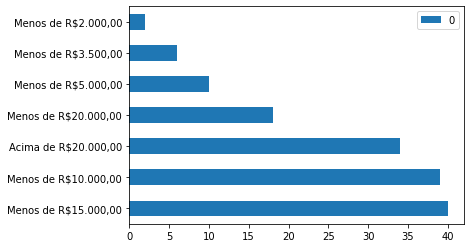

In [33]:
senior.plot.barh()

## Salários sênior por região

In [34]:
salario_por_nivel_e_estado('Sênior', 'São Paulo')

,Qual o nível do seu cargo atual
"Se você trabalha, qual seu nível de salário?",
"Acima de R$20.000,00",9
"Menos de R$10.000,00",10
"Menos de R$15.000,00",16
"Menos de R$20.000,00",10
"Menos de R$3.500,00",2
"Menos de R$5.000,00",2


In [35]:
salario_por_nivel_e_estado('Sênior', 'Exterior')

,Qual o nível do seu cargo atual
"Se você trabalha, qual seu nível de salário?",
"Acima de R$20.000,00",8
"Menos de R$10.000,00",3
"Menos de R$15.000,00",2
"Menos de R$5.000,00",1


# Principal

<AxesSubplot:>

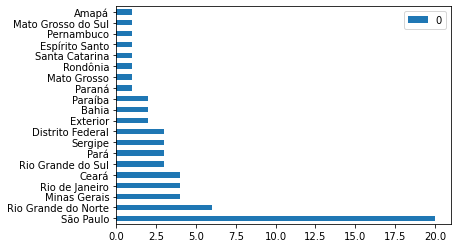

In [36]:
principal_lugares = counter_estado(cargos_brasil, 'Principal')
principal_lugares.plot.barh()

In [37]:
principal_lugares

,0
São Paulo,20
Rio Grande do Norte,6
Minas Gerais,4
Rio de Janeiro,4
Ceará,4
Rio Grande do Sul,3
Pará,3
Sergipe,3
Distrito Federal,3
Exterior,2


## Salários Principal

In [38]:
principal = counter_salario(cargos_brasil, 'Principal')
principal

,0
"Acima de R$20.000,00",12
"Menos de R$5.000,00",12
"Menos de R$10.000,00",11
"Menos de R$3.500,00",9
"Menos de R$15.000,00",5
"Menos de R$20.000,00",5
"Menos de R$2.000,00",4


## Salário Principal por região

In [39]:
salario_por_nivel_e_estado('Principal', 'São Paulo')

,Qual o nível do seu cargo atual
"Se você trabalha, qual seu nível de salário?",
"Acima de R$20.000,00",5
"Menos de R$10.000,00",2
"Menos de R$15.000,00",3
"Menos de R$20.000,00",2
"Menos de R$3.500,00",2
"Menos de R$5.000,00",3


In [40]:
salario_por_nivel_e_estado('Principal', 'Rio Grande do Norte')

,Qual o nível do seu cargo atual
"Se você trabalha, qual seu nível de salário?",
"Menos de R$10.000,00",1
"Menos de R$20.000,00",1
"Menos de R$3.500,00",3


In [41]:
salario_por_nivel_e_estado('Principal', 'Minas Gerais')

,Qual o nível do seu cargo atual
"Se você trabalha, qual seu nível de salário?",
"Acima de R$20.000,00",1
"Menos de R$2.000,00",1
"Menos de R$20.000,00",1


<AxesSubplot:>

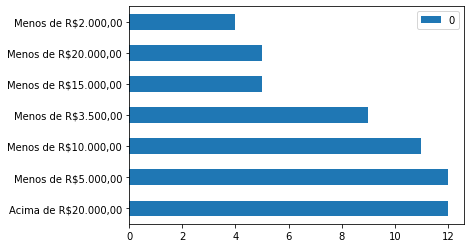

In [42]:
principal.plot.barh()

## Agrupamento por salário

In [51]:
bg = brasil2.groupby('Se você trabalha, qual seu nível de salário?').aggregate(lambda x: len(x))
bg['Unnamed: 0']

Se você trabalha, qual seu nível de salário?
Acima de R$20.000,00     49
Menos de R$10.000,00    150
Menos de R$15.000,00     68
Menos de R$2.000,00     168
Menos de R$20.000,00     35
Menos de R$3.500,00     114
Menos de R$5.000,00     101
Name: Unnamed: 0, dtype: int64

<AxesSubplot:ylabel='Se você trabalha, qual seu nível de salário?'>

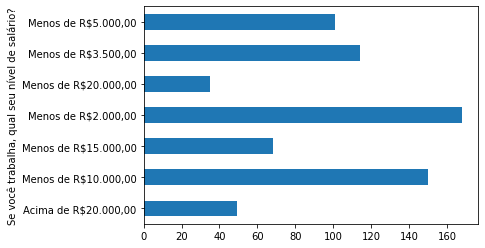

In [52]:
bg['Unnamed: 0'].plot.barh()

In [55]:
brasil['Se você trabalha, qual seu nível de salário?'].no.apply(
    lambda x: x.splt('$')[1]
)

AttributeError: 'str' object has no attribute 'splt'